In [2]:
#code by Rohit Chandra Joshi
#importing required libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix

In [3]:
#loading the mnist dataset
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
#shape of dataset
len(x_train)

60000

In [5]:
len(x_test)

10000

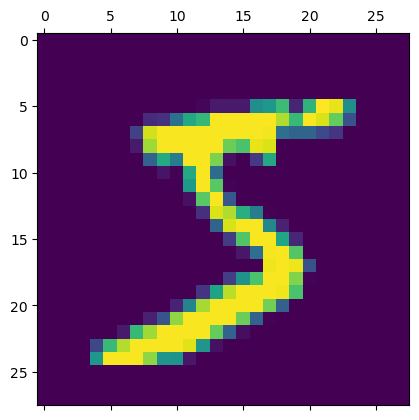

In [6]:
plt.matshow(x_train[0])

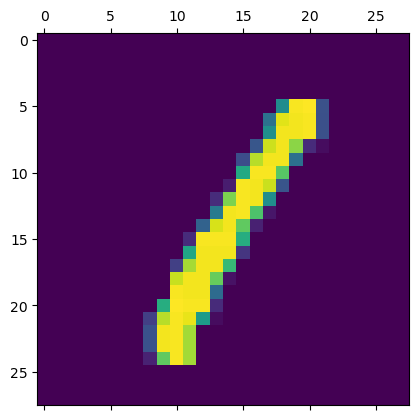

In [7]:
plt.matshow(x_train[3])

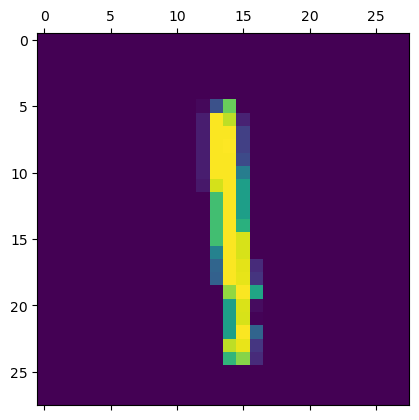

In [8]:
plt.matshow(x_train[8])

In [9]:
#normalizing the dataset
x_train = x_train / 255
x_test = x_test / 255

In [14]:
#creating the layers for CNN
n_classes = 10

model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(n_classes, activation='softmax')
])


In [15]:
#compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 1, 1, 128)       

In [17]:
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 15s 4ms/step - loss: 0.2713 - accuracy: 0.9151
Epoch 2/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0847 - accuracy: 0.9764
Epoch 3/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0631 - accuracy: 0.9827
Epoch 4/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0505 - accuracy: 0.9862
Epoch 5/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0447 - accuracy: 0.9873
Epoch 6/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0367 - accuracy: 0.9896
Epoch 7/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0292 - accuracy: 0.9916
Epoch 8/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0304 - accuracy: 0.9911
Epoch 9/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0267 - accuracy: 0.9925
Epoch 10/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.02